<a href="https://colab.research.google.com/github/chebil/stat/blob/main/part2/ch04_weak_law.ipynb" target="_blank" rel="noopener noreferrer"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.3 The Weak Law of Large Numbers

The **Weak Law of Large Numbers** is one of the most important results in probability and statistics. It tells us that if we repeat an experiment many times, the average of the results will be close to the expected value with high probability.

This justifies:
- **Simulation**: Running many trials approximates theoretical behavior
- **Sampling**: Large samples reveal population properties
- **Monte Carlo methods**: Random sampling for numerical computation
- **Statistical inference**: Estimating parameters from data

## 4.3.1 IID Samples

### Definition: IID

Random variables $X_1, X_2, \ldots, X_N$ are **independent and identically distributed** (IID) if:
1. They are mutually independent
2. They all have the same probability distribution

### Sample Mean

The **sample mean** of $N$ IID random variables is:
$$\bar{X}_N = \frac{1}{N}\sum_{i=1}^{N} X_i$$

This is itself a random variable!

n=1: Mean of sample means = 3.4999, Std = 1.7086
n=5: Mean of sample means = 3.5086, Std = 0.7675
n=20: Mean of sample means = 3.4987, Std = 0.3814
n=100: Mean of sample means = 3.4994, Std = 0.1714


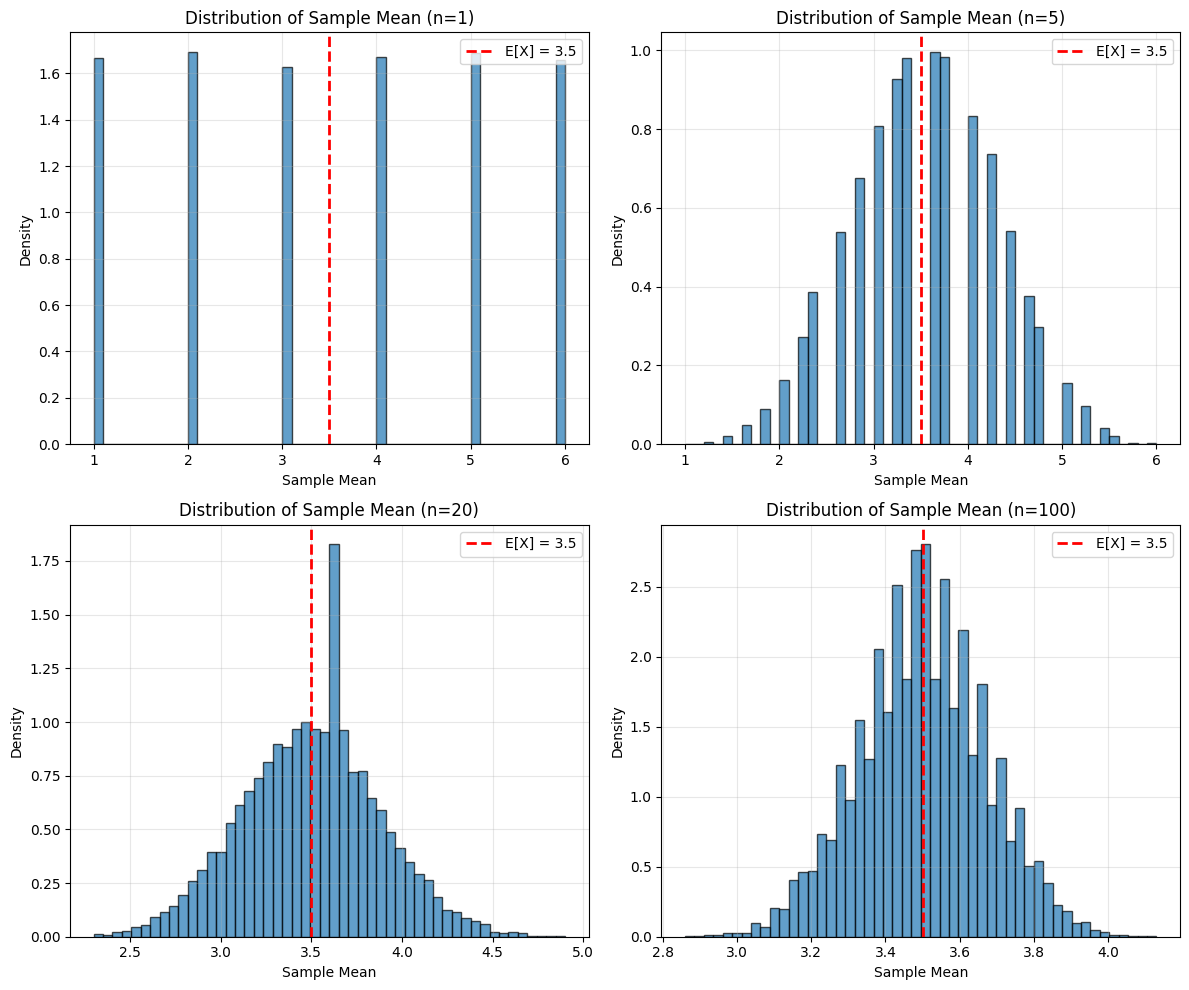

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate many sample means
np.random.seed(42)
num_experiments = 10000

# For different sample sizes
sample_sizes = [1, 5, 20, 100]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, n in enumerate(sample_sizes):
    sample_means = []
    for _ in range(num_experiments):
        # Roll n dice and compute mean
        rolls = np.random.randint(1, 7, size=n)
        sample_means.append(np.mean(rolls))
    
    axes[idx].hist(sample_means, bins=50, edgecolor='black', density=True, alpha=0.7)
    axes[idx].axvline(3.5, color='r', linestyle='--', linewidth=2, label='E[X] = 3.5')
    axes[idx].set_xlabel('Sample Mean')
    axes[idx].set_ylabel('Density')
    axes[idx].set_title(f'Distribution of Sample Mean (n={n})')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)
    
    # Print statistics
    print(f"n={n}: Mean of sample means = {np.mean(sample_means):.4f}, Std = {np.std(sample_means):.4f}")

plt.tight_layout()
plt.show()

Markov's Inequality: P(X ≥ a) ≤ E[X]/a
For X ~ Exponential(λ=0.5), E[X] = 2.0

a =  2: P(X ≥ 2) = 0.3679 ≤ 1.0000 ✓
a =  4: P(X ≥ 4) = 0.1353 ≤ 0.5000 ✓
a =  6: P(X ≥ 6) = 0.0498 ≤ 0.3333 ✓
a =  8: P(X ≥ 8) = 0.0183 ≤ 0.2500 ✓
a = 10: P(X ≥ 10) = 0.0067 ≤ 0.2000 ✓


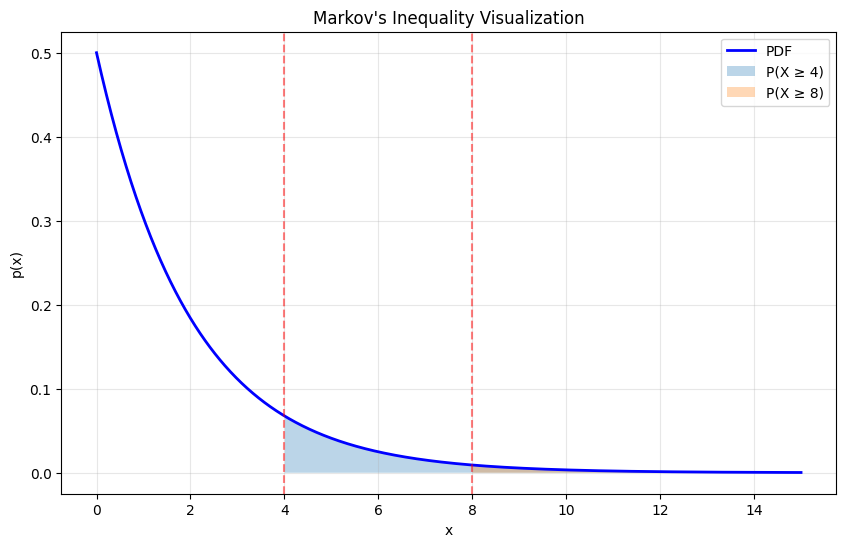

In [2]:
# Demonstrate Markov's Inequality
from scipy import stats

# Exponential distribution with mean 2
lambda_rate = 0.5
expected_value = 1 / lambda_rate

# Check inequality for different values of a
a_values = [2, 4, 6, 8, 10]

print("Markov's Inequality: P(X ≥ a) ≤ E[X]/a")
print(f"For X ~ Exponential(λ={lambda_rate}), E[X] = {expected_value}\n")

for a in a_values:
    true_prob = 1 - stats.expon.cdf(a, scale=1/lambda_rate)
    markov_bound = expected_value / a
    print(f"a = {a:2d}: P(X ≥ {a}) = {true_prob:.4f} ≤ {markov_bound:.4f} ✓")

# Visualize
x = np.linspace(0, 15, 1000)
pdf = stats.expon.pdf(x, scale=1/lambda_rate)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, 'b-', linewidth=2, label='PDF')
for a in [4, 8]:
    plt.fill_between(x, 0, pdf, where=(x>=a), alpha=0.3, label=f'P(X ≥ {a})')
    plt.axvline(a, color='red', linestyle='--', alpha=0.5)

plt.xlabel('x')
plt.ylabel('p(x)')
plt.title("Markov's Inequality Visualization")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Chebyshev's Inequality: P(|X - μ| ≥ kσ) ≤ 1/k²
For X ~ Normal(μ=100, σ=15)

k = 1: P(|X - 100| ≥ 1×15) = 0.3173 ≤ 1.0000 ✓
k = 2: P(|X - 100| ≥ 2×15) = 0.0455 ≤ 0.2500 ✓
k = 3: P(|X - 100| ≥ 3×15) = 0.0027 ≤ 0.1111 ✓
k = 4: P(|X - 100| ≥ 4×15) = 0.0001 ≤ 0.0625 ✓
k = 5: P(|X - 100| ≥ 5×15) = 0.0000 ≤ 0.0400 ✓


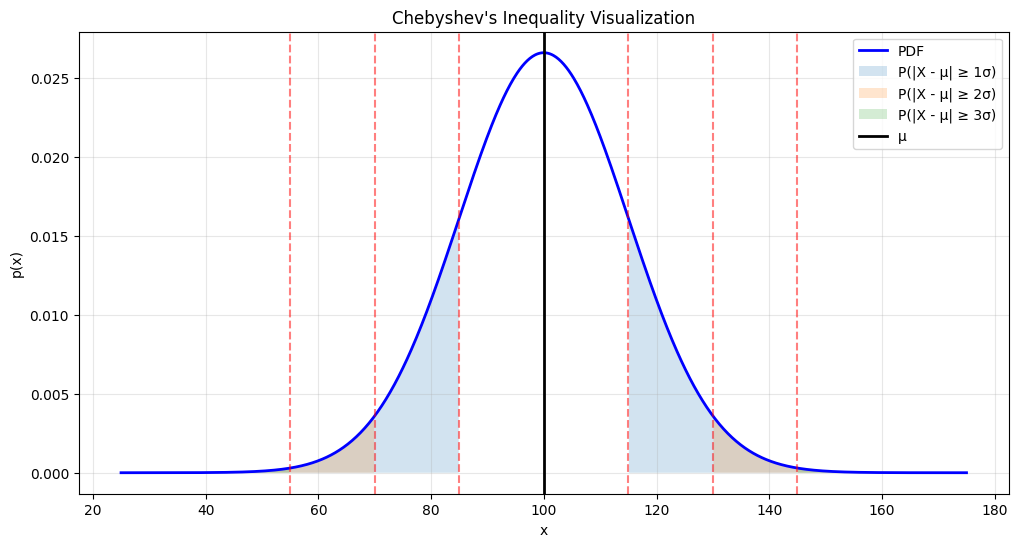

In [3]:
# Demonstrate Chebyshev's Inequality
from scipy import stats

# Normal distribution
mu, sigma = 100, 15
k_values = [1, 2, 3, 4, 5]

print("\nChebyshev's Inequality: P(|X - μ| ≥ kσ) ≤ 1/k²")
print(f"For X ~ Normal(μ={mu}, σ={sigma})\n")

for k in k_values:
    true_prob = 1 - (stats.norm.cdf(mu + k*sigma, mu, sigma) - 
                      stats.norm.cdf(mu - k*sigma, mu, sigma))
    chebyshev_bound = 1 / k**2
    print(f"k = {k}: P(|X - {mu}| ≥ {k}×{sigma}) = {true_prob:.4f} ≤ {chebyshev_bound:.4f} ✓")

# Visualize
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)
pdf = stats.norm.pdf(x, mu, sigma)

plt.figure(figsize=(12, 6))
plt.plot(x, pdf, 'b-', linewidth=2, label='PDF')

for k in [1, 2, 3]:
    plt.fill_between(x, 0, pdf, 
                     where=((x <= mu - k*sigma) | (x >= mu + k*sigma)), 
                     alpha=0.2, label=f'P(|X - μ| ≥ {k}σ)')
    plt.axvline(mu - k*sigma, color='red', linestyle='--', alpha=0.5)
    plt.axvline(mu + k*sigma, color='red', linestyle='--', alpha=0.5)

plt.axvline(mu, color='black', linestyle='-', linewidth=2, label='μ')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title("Chebyshev's Inequality Visualization")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

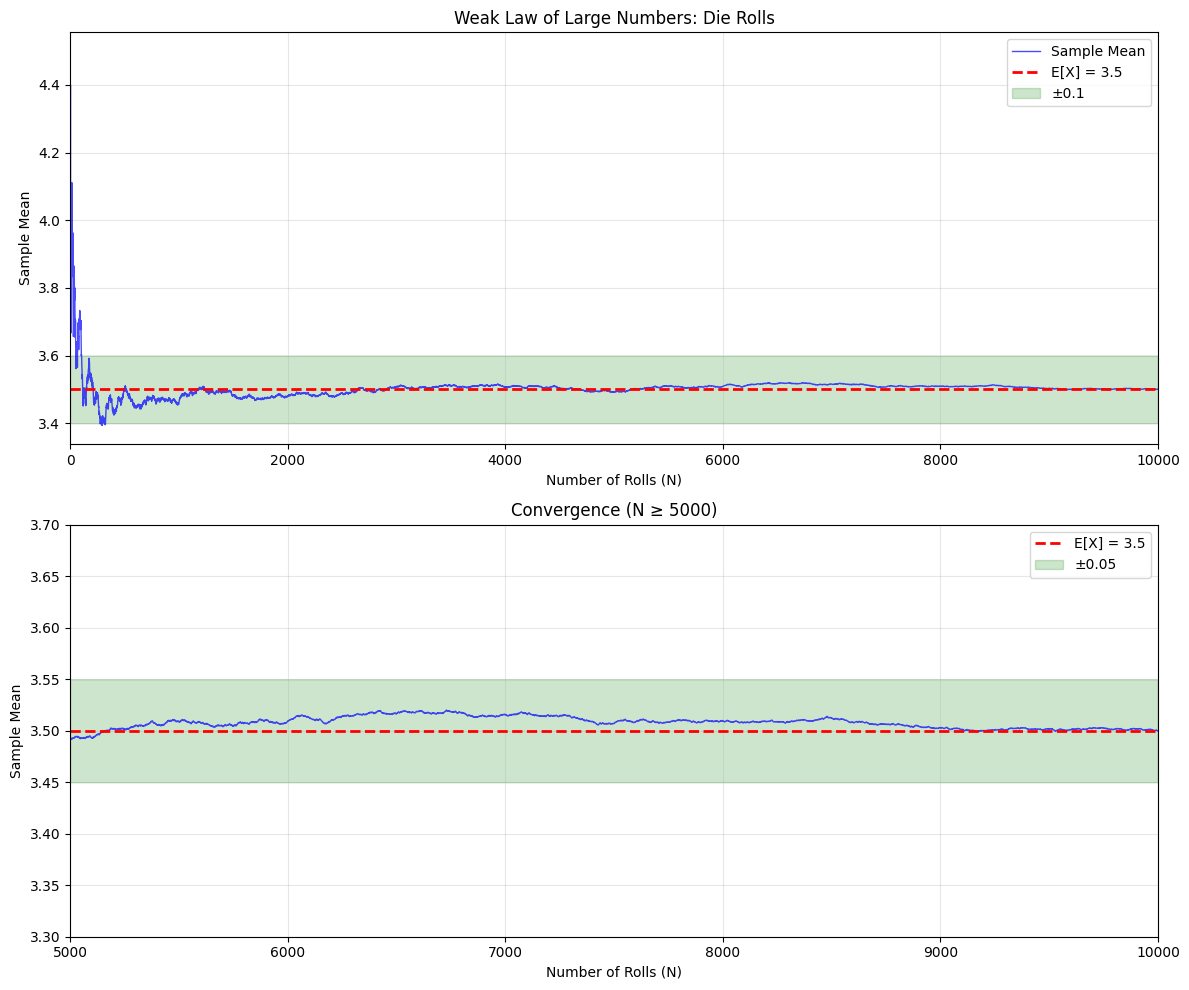


After 10000 rolls:
Sample mean: 3.499900
True mean: 3.5
Error: 0.000100


In [4]:
# Demonstrate the Weak Law
np.random.seed(42)

# True mean of a die
true_mean = 3.5

# Compute running average
max_n = 10000
rolls = np.random.randint(1, 7, size=max_n)
running_mean = np.cumsum(rolls) / np.arange(1, max_n + 1)

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Full range
ax1.plot(running_mean, 'b-', linewidth=1, alpha=0.7, label='Sample Mean')
ax1.axhline(true_mean, color='r', linestyle='--', linewidth=2, label=f'E[X] = {true_mean}')
ax1.fill_between(range(max_n), true_mean - 0.1, true_mean + 0.1, alpha=0.2, color='green', label='±0.1')
ax1.set_xlabel('Number of Rolls (N)')
ax1.set_ylabel('Sample Mean')
ax1.set_title('Weak Law of Large Numbers: Die Rolls')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim([0, max_n])

# Zoomed in on tail
ax2.plot(range(5000, max_n), running_mean[5000:], 'b-', linewidth=1, alpha=0.7)
ax2.axhline(true_mean, color='r', linestyle='--', linewidth=2, label=f'E[X] = {true_mean}')
ax2.fill_between(range(5000, max_n), true_mean - 0.05, true_mean + 0.05, 
                  alpha=0.2, color='green', label='±0.05')
ax2.set_xlabel('Number of Rolls (N)')
ax2.set_ylabel('Sample Mean')
ax2.set_title('Convergence (N ≥ 5000)')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim([5000, max_n])
ax2.set_ylim([3.3, 3.7])

plt.tight_layout()
plt.show()

print(f"\nAfter {max_n} rolls:")
print(f"Sample mean: {running_mean[-1]:.6f}")
print(f"True mean: {true_mean}")
print(f"Error: {abs(running_mean[-1] - true_mean):.6f}")

In [5]:
# How many samples needed?
sigma_squared = 35/12  # Variance of a die roll
epsilon = 0.1  # Desired accuracy
delta = 0.05  # Acceptable failure probability

N_required = sigma_squared / (epsilon**2 * delta)

print(f"\nTo guarantee |X̄_N - μ| < {epsilon} with probability ≥ {1-delta}:")
print(f"Need N ≥ {N_required:.0f} samples")

# Verify
np.random.seed(42)
num_trials = 10000
successes = 0

for _ in range(num_trials):
    sample = np.random.randint(1, 7, size=int(N_required))
    sample_mean = np.mean(sample)
    if abs(sample_mean - 3.5) < epsilon:
        successes += 1

empirical_prob = successes / num_trials
print(f"\nEmpirical verification ({num_trials} trials):")
print(f"Success rate: {empirical_prob:.4f}")
print(f"Guaranteed rate: {1-delta:.4f}")


To guarantee |X̄_N - μ| < 0.1 with probability ≥ 0.95:
Need N ≥ 5833 samples

Empirical verification (10000 trials):
Success rate: 1.0000
Guaranteed rate: 0.9500


## Summary

{admonition} Key Results
:class: important

**Markov's Inequality**: For non-negative $X$:

$$P(X \geq a) \leq \frac{E[X]}{a}$$

**Chebyshev's Inequality**:

$$P(|X - \mu| \geq \epsilon) \leq \frac{\sigma^2}{\epsilon^2}$$

**Weak Law of Large Numbers**: For IID $X_1, \ldots, X_N$ with mean $\mu$:

$$\lim_{N \to \infty} P(|\bar{X}_N - \mu| < \epsilon) = 1$$

**Practical implication**: Sample means converge to expected values!


## Why This Matters

1. **Justifies simulation**: Compute $E[X]$ by averaging many samples
2. **Enables estimation**: Use sample statistics to estimate population parameters
3. **Validates randomized algorithms**: Average performance approaches expected performance
4. **Supports Monte Carlo methods**: Random sampling for numerical integration and optimization
5. **Founds statistical inference**: Basis for confidence intervals and hypothesis tests

## Practice Problems

1. Use Markov's inequality to bound $P(X \geq 10)$ if $E[X] = 2$.

2. Use Chebyshev's inequality to bound $P(|X - 50| \geq 10)$ if $\text{Var}(X) = 25$.

3. How many coin flips do you need so that the sample proportion of heads is within 0.01 of 0.5 with probability at least 0.99?

4. Simulate 10,000 experiments where you roll a die 100 times. What fraction have sample mean within 0.2 of 3.5?

## Next Section

Now let's see how to use expectations and the weak law in practical decision-making.

→ Continue to [4.4 Using the Weak Law of Large Numbers](ch04_applications.md)